In [3]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = {
    'age': [25, 30, 35, 40, 45],
    'height': [160, 170, 180, 190, 200],
}
# convert data into data frame
df = pd.DataFrame(df)
df.head()

C:\Users\Yahya\AppData\Local\Temp\ipykernel_6968\415940802.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,age,height
0,25,160
1,30,170
2,35,180
3,40,190
4,45,200


In [4]:
# import the scaler
scaler = StandardScaler()
# fit the scaler to the data
# scaler.fit(df)
# transform the data
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


In [5]:
# convert this data into a pandas data frame
df = pd.DataFrame(scaled_data, columns=['age', 'height'])
df.head()

,age,height
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [6]:

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler

In [8]:
# import the scaler
scaler = MinMaxScaler()
# fit the scaler to the data
scaler.fit(df)
# transform the data
scaled_data = scaler.fit_transform(df)
print(scaled_data)

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [0.75 0.75]
 [1.   1.  ]]


----
Transformation

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# load random data
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns=['Value']) # it convert the data into data frame means row and column and value means name of column is value
df.tail() 

,Value
995,0.205564
996,1.446892
997,5.574577
998,0.519217
999,2.261080


In [50]:
df.shape
# it shows that there are 1000 rows and 1 column

(1000, 1)

<Axes: xlabel='Value', ylabel='Count'>

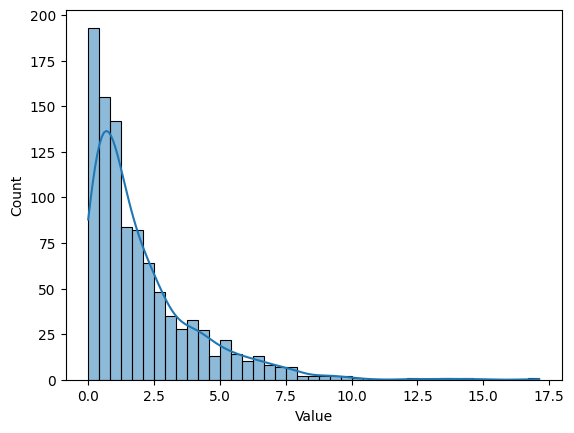

In [90]:
# make his ploat
sns.histplot(df['Value'], kde=True)
# it ploat the data in histogram form and kde = true means it will show the density curve
# it shows that the data is not normally distributed
# if we use kde = false it will not show the density curve
# density curve means the line showing the density, see the below graph

<Axes: >

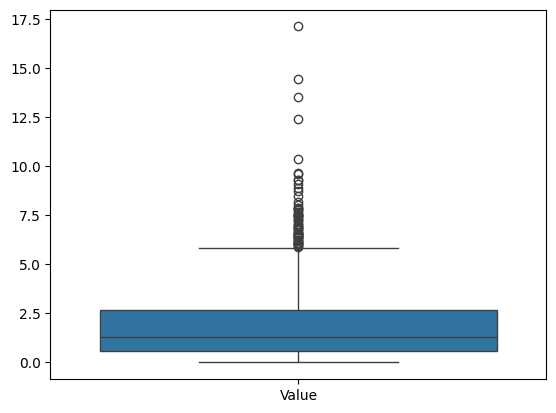

In [55]:
# make box plot
sns.boxplot(df)

### Apply transformation on this daata

In [70]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=True)
# Data must be positive for box-cox transformation to work
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=True)
pt_quantile = QuantileTransformer(output_distribution='normal')
df['box_cox'] = pt_boxcox.fit_transform(df[['Value']]+1)
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['Value']])
df['Quantile'] = pt_quantile.fit_transform(df[['Value']])


In [66]:
df.head()

,Value,box_cox,yeo_johnson
0,1.591749,0.179335,0.179335
1,2.511862,0.677331,0.677331
2,1.846446,0.339698,0.339698
3,1.574402,0.167607,0.167607
4,1.102097,-0.202107,-0.202107


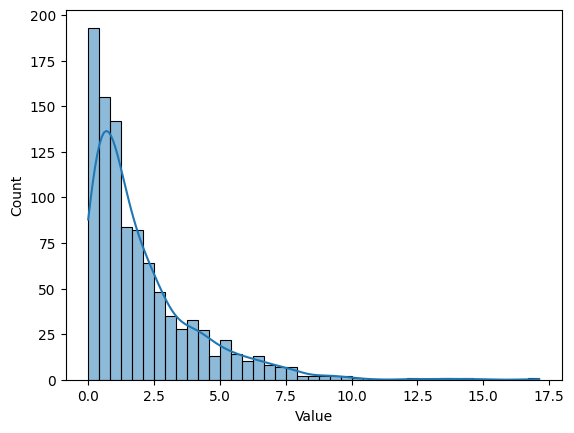

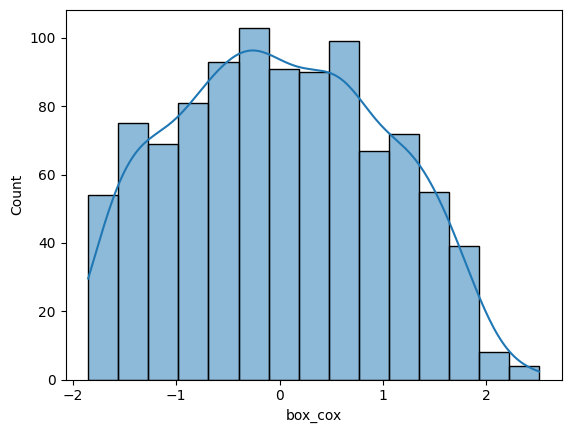

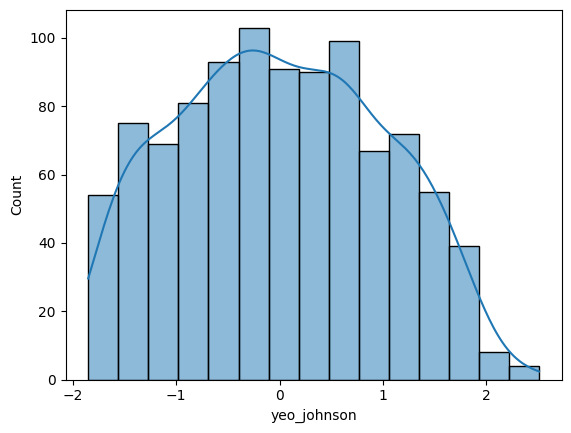

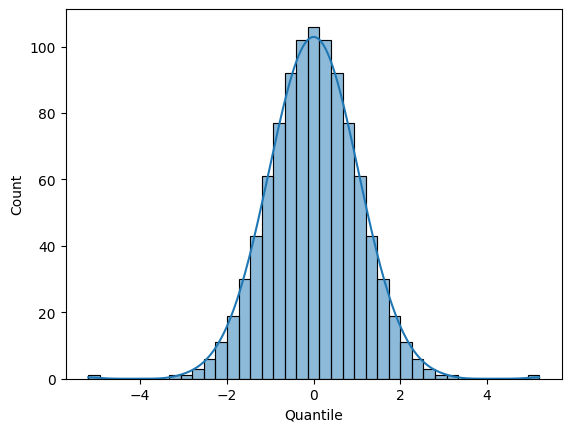

In [71]:
# Create histogram for all columns using sns.his and kde = ture using for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

<Axes: ylabel='Count'>

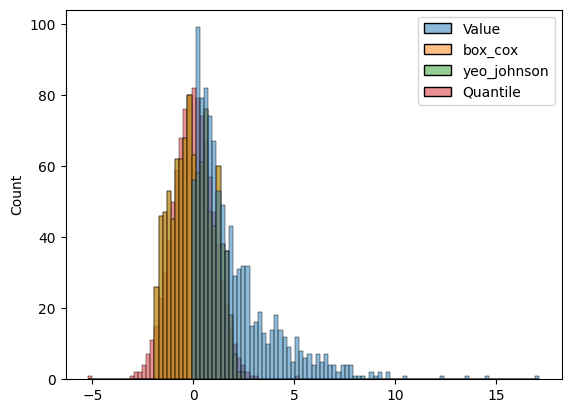

In [92]:
sns.histplot(df)

---
Normalization 
L1 normalization scales a vector by dividing each component by the sum of the absolute values of all components, resulting in a vector where the sum of absolute values equals 1. 

L2 normalization scales a vector by dividing each component by the square root of the sum of the squares of all components, resulting in a vector where the Euclidean distance from the origin equals 1.

In [96]:
# import liberaries for L1 and L2 normization and take the data and apply l2 normalization
from sklearn.preprocessing import StandardScaler

data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))



[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 normalization
also rescale the data to have a sum of 1, this is called l1 normalization, which is also referred to as the L1 norm. The L1 norm is the sum of the absolute values of the components of the vector. For example, if you have a vector [1, 2, 3], the L1 norm is 6. 

In [98]:
# applying l2 normalization
# import liberaries for L1 and L2 normization and take the data and apply l2 normalization
from sklearn.preprocessing import Normalizer


data = [[1,1,1], [1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))



[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


### Z-Score Normalization
        i. Standard Scalar
### Min-Max Normalization
        i. MinMax Scalar


### Log Transformation

In [102]:
import pandas as pd
import numpy as np

# Example dataset with skewed distribution
df = {'Values': [1,5,10,20,50,100,200,500,1000,2000,5000,10000]}
df = pd.DataFrame(df)
df.head()


,Values
0,1
1,5
2,10
3,20
4,50


<Axes: ylabel='Count'>

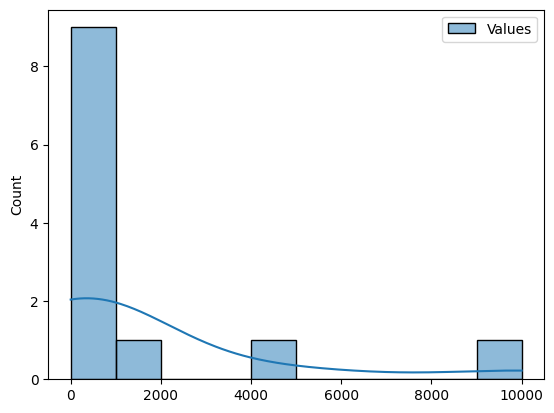

In [103]:
sns.histplot(df, kde=True)

In [105]:
# apply log transformation
df['log_values'] = np.log(df['Values'])
df.head()

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023


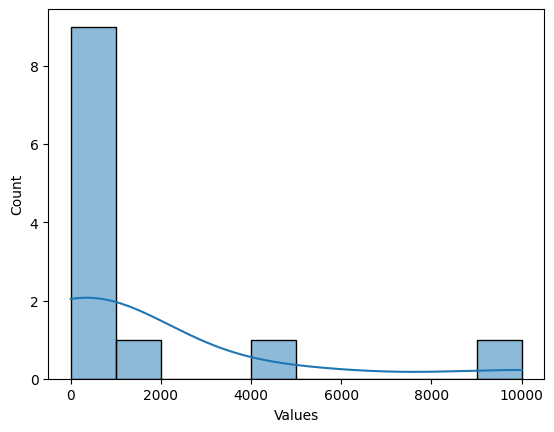

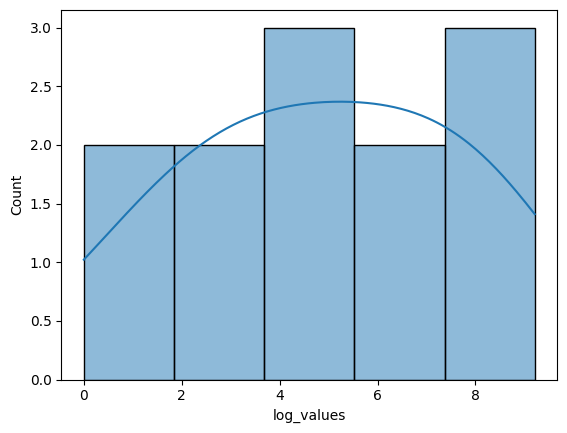

In [109]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

In [ ]:
X_test = np.array([-3, -1, -4])
X_min_max_scaler = MinMaxScaler.t(X_test)